In [161]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [162]:
df = pd.read_csv('exclude_no_votes.csv')
df.head()

,policy_id,date,party,votes_for,votes_against,abstentions,no_votes,majority_vote_count,majority_col,total_votes,percent_dissenters
0,152666,2023-02-13 17:16:09,Progressive Alliance of Socialists and Democrats,88,0,0,56,88,votes_for,88,0.000000
1,152666,2023-02-13 17:16:09,Renew Europe,62,0,1,39,62,votes_for,63,1.587302
2,152666,2023-02-13 17:16:09,Greens/European Free Alliance,51,0,0,20,51,votes_for,51,0.000000
3,152666,2023-02-13 17:16:09,The Left in the European Parliament – GUE/NGL,21,0,0,17,21,votes_for,21,0.000000
4,152669,2023-02-13 17:23:55,The Left in the European Parliament – GUE/NGL,1,23,0,14,23,votes_against,24,4.166667


In [163]:
df = pd.read_csv('master_votes.csv')
df.head()

,position,member.id,member.first_name,member.last_name,member.country.code,member.country.label,member.country.iso_alpha_2,member.group.code,member.group.label,member.group.short_label,vote_id
0,DID_NOT_VOTE,256810,Mika,AALTOLA,FIN,Finland,FI,EPP,European Peopleâs Party,EPP,176731
1,FOR,257043,Maravillas,ABADÃA JOVER,ESP,Spain,ES,EPP,European Peopleâs Party,EPP,176731
2,FOR,197490,Magdalena,ADAMOWICZ,POL,Poland,PL,EPP,European Peopleâs Party,EPP,176731
3,FOR,256820,Georgios,AFTIAS,GRC,Greece,GR,EPP,European Peopleâs Party,EPP,176731
4,AGAINST,256987,Oihane,AGIRREGOITIA MARTÃNEZ,ESP,Spain,ES,RENEW,Renew Europe,Renew,176731


In [164]:
dates_df = pd.read_csv('votes_past_5_years.csv')
dates_df.head()

,vote_id,timestamp,display_title
0,176731,2025-05-22,Deliberations of the Committee on Petitions in...
1,176681,2025-05-22,Euratom research and training programme 2026-2027
2,176688,2025-05-22,Granting equivalence with EU requirements to M...
3,176844,2025-05-22,Modification of customs duties applicable to i...
4,176873,2025-05-22,Carbon Border Adjustment Mechanism: simplifica...


In [165]:
# merge to bring in timestamps
merged_df = df.merge(dates_df[['vote_id', 'timestamp']], on='vote_id', how='left')

# convert timestamp to datetime
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'])

merged_df.head()

,position,member.id,member.first_name,member.last_name,member.country.code,member.country.label,member.country.iso_alpha_2,member.group.code,member.group.label,member.group.short_label,vote_id,timestamp
0,DID_NOT_VOTE,256810,Mika,AALTOLA,FIN,Finland,FI,EPP,European Peopleâs Party,EPP,176731,2025-05-22
1,FOR,257043,Maravillas,ABADÃA JOVER,ESP,Spain,ES,EPP,European Peopleâs Party,EPP,176731,2025-05-22
2,FOR,197490,Magdalena,ADAMOWICZ,POL,Poland,PL,EPP,European Peopleâs Party,EPP,176731,2025-05-22
3,FOR,256820,Georgios,AFTIAS,GRC,Greece,GR,EPP,European Peopleâs Party,EPP,176731,2025-05-22
4,AGAINST,256987,Oihane,AGIRREGOITIA MARTÃNEZ,ESP,Spain,ES,RENEW,Renew Europe,Renew,176731,2025-05-22


In [166]:
# clean party names
merged_df = merged_df.replace('European Peopleâs Party', 'European People\'s Party')
merged_df = merged_df.replace('The Left in the European Parliament â GUE/NGL', 'The Left in the European Parliament')
merged_df.head()

,position,member.id,member.first_name,member.last_name,member.country.code,member.country.label,member.country.iso_alpha_2,member.group.code,member.group.label,member.group.short_label,vote_id,timestamp
0,DID_NOT_VOTE,256810,Mika,AALTOLA,FIN,Finland,FI,EPP,European People's Party,EPP,176731,2025-05-22
1,FOR,257043,Maravillas,ABADÃA JOVER,ESP,Spain,ES,EPP,European People's Party,EPP,176731,2025-05-22
2,FOR,197490,Magdalena,ADAMOWICZ,POL,Poland,PL,EPP,European People's Party,EPP,176731,2025-05-22
3,FOR,256820,Georgios,AFTIAS,GRC,Greece,GR,EPP,European People's Party,EPP,176731,2025-05-22
4,AGAINST,256987,Oihane,AGIRREGOITIA MARTÃNEZ,ESP,Spain,ES,RENEW,Renew Europe,Renew,176731,2025-05-22


In [167]:
filtered_df = merged_df[['member.id', 'member.first_name', 'member.last_name', 'position', 'member.group.label', 'vote_id', 'timestamp']]
filtered_df.rename(columns={'member.id': 'mep_id', 'member.first_name': 'mep_first_name', 'member.last_name' : 'mep_last_name', 'member.group.label' : 'party'}, inplace=True)
filtered_df.head()

/var/folders/7b/_tryzj5x7c1cbdsctzz8q2zc0000gn/T/ipykernel_78812/2475857770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.rename(columns={'member.id': 'mep_id', 'member.first_name': 'mep_first_name', 'member.last_name' : 'mep_last_name', 'member.group.label' : 'party'}, inplace=True)


,mep_id,mep_first_name,mep_last_name,position,party,vote_id,timestamp
0,256810,Mika,AALTOLA,DID_NOT_VOTE,European People's Party,176731,2025-05-22
1,257043,Maravillas,ABADÃA JOVER,FOR,European People's Party,176731,2025-05-22
2,197490,Magdalena,ADAMOWICZ,FOR,European People's Party,176731,2025-05-22
3,256820,Georgios,AFTIAS,FOR,European People's Party,176731,2025-05-22
4,256987,Oihane,AGIRREGOITIA MARTÃNEZ,AGAINST,Renew Europe,176731,2025-05-22


### We are trying to make another dataframe where each row represents a party's aggregate stats on a particular vote id.

We will have the columns: party, vote_id, timestamp, num_for, num_against, num_abstention, num_no_votes, total_votes (does not include no votes), majority_col (string: for, against, or abstain (or no_votes)), majority_votes (number of votes for that party that AGREE w the majority), percent_dissent (percent of for, against, and abstain votes that agree with the MAJORITY)

We have to drop rows where the majority_col is no_votes before calculating percent dissenters

In [182]:
# filter only relevant vote positions
valid_positions = ['FOR', 'AGAINST', 'ABSTENTION', 'DID_NOT_VOTE']
filtered_df = filtered_df[filtered_df['position'].isin(valid_positions)]

# group and count positions by party and vote
vote_counts = (filtered_df.groupby(['vote_id', 'timestamp', 'party', 'position']).size().unstack(fill_value=0).reset_index())

# rename vote columns for clarity
vote_counts = vote_counts.rename(columns={'FOR': 'num_for', 'AGAINST': 'num_against', 
                                          'ABSTENTION': 'num_abstention', 'DID_NOT_VOTE': 'num_no_votes'})

# ensure all columns exist
for col in ['num_for', 'num_against', 'num_abstention', 'num_no_votes']:
    if col not in vote_counts.columns:
        vote_counts[col] = 0

# compute total votes (excluding no votes)
vote_counts['total_votes'] = (vote_counts['num_for'] + vote_counts['num_against'] + vote_counts['num_abstention'])

# get relevant vote cols
vote_subset = vote_counts[['num_for', 'num_against', 'num_abstention']]

# get the column with the highest value per row
vote_counts['majority_col'] = vote_subset.idxmax(axis=1).str.replace('num_', '').str.upper()

# get the max value of votes
vote_counts['majority_votes'] = vote_subset.max(axis=1)

# merge majority info back
#df_final = vote_counts.merge(majority_col, on=['vote_id', 'timestamp'])
df_final = vote_counts

# drop rows where majority_col == 'DID_NOT_VOTE'
df_final = df_final[df_final['majority_col'] != 'DID_NOT_VOTE']

# compute majority_votes for this party
def get_majority_votes(row):
    return row[f'num_{row["majority_col"].lower()}']

df_final['majority_votes'] = df_final.apply(get_majority_votes, axis=1)

# compute percent dissenters
df_final['percent_dissent'] = 1 - (df_final['majority_votes'] / df_final['total_votes'])

# optional final ordering
df_final = df_final[[
    'party', 'vote_id', 'timestamp', 'num_for', 'num_against', 'num_abstention', 'num_no_votes',
    'total_votes', 'majority_col', 'majority_votes', 'percent_dissent']]

df_final

position,party,vote_id,timestamp,num_for,num_against,num_abstention,num_no_votes,total_votes,majority_col,majority_votes,percent_dissent
0,European Conservatives and Reformists,136124,2021-10-07,2,6,46,0,54,ABSTENTION,46,0.148148
1,European People's Party,136124,2021-10-07,148,0,0,3,148,FOR,148,0.000000
2,Greens/European Free Alliance,136124,2021-10-07,59,0,0,8,59,FOR,59,0.000000
3,Identity and Democracy,136124,2021-10-07,0,41,23,0,64,AGAINST,41,0.359375
4,Non-attached Members,136124,2021-10-07,18,9,9,1,36,FOR,18,0.500000
...,...,...,...,...,...,...,...,...,...,...,...
11485,Non-attached Members,176873,2025-05-22,18,3,2,6,23,FOR,18,0.217391
11486,Patriots for Europe,176873,2025-05-22,58,6,6,15,70,FOR,58,0.171429
11487,Progressive Alliance of Socialists and Democrats,176873,2025-05-22,104,2,0,30,106,FOR,104,0.018868
11488,Renew Europe,176873,2025-05-22,64,0,0,11,64,FOR,64,0.000000


In [ ]:
# sort by party (primary) then timestamp within that

In [184]:
set(df_final['party'])

{'Europe of Sovereign Nations',
 'European Conservatives and Reformists',
 "European People's Party",
 'Greens/European Free Alliance',
 'Identity and Democracy',
 'Non-attached Members',
 'Patriots for Europe',
 'Progressive Alliance of Socialists and Democrats',
 'Renew Europe',
 'The Left in the European Parliament'}

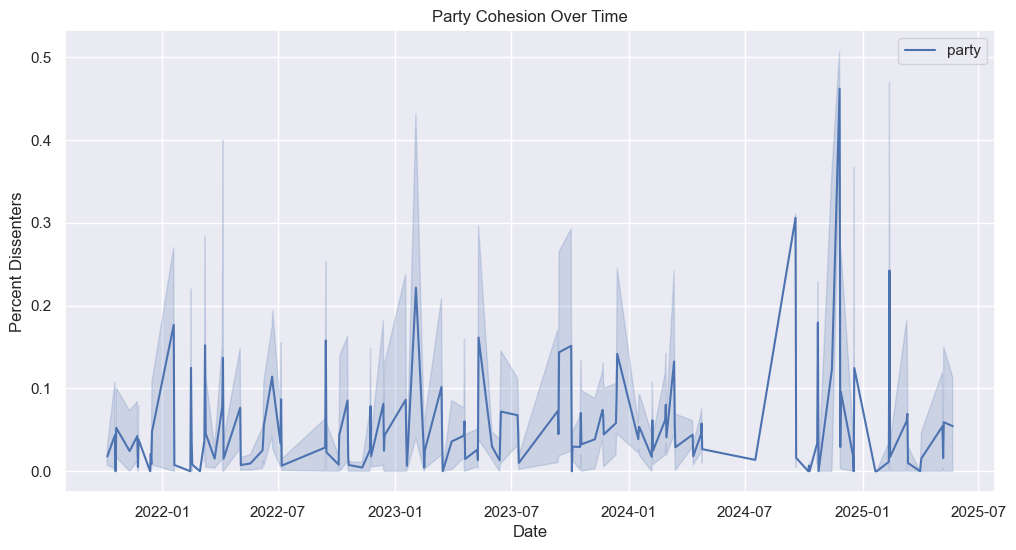

In [183]:
sns.set_theme(style="darkgrid")
sns.color_palette("Set2")

df_renew = df_final[df_final['party'] == 'Renew Europe']

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_renew, x='timestamp', y='percent_dissent', label='party')

plt.xlabel('Date')
plt.ylabel('Percent Dissenters')
plt.title('Party Cohesion Over Time')
plt.legend()
plt.show()

In [171]:
df_final.to_csv('time_series_data.csv', index=False) 